In [1]:
import numpy as np

from maxtrix_inversion_qsvt import MatrixInversionQSVT, QuantumSolverQSVT
from helpers import *

import matplotlib.pyplot as plt

In [2]:
n = 5
eigval_min = 0.3
eigval_max =  2
D = np.diag(np.linspace(eigval_min, eigval_max, 2**n))
U = generate_random_unitary(2**n)
A = U @ D @ U.T.conj()

# A = (A + 1j*A) / 2 # non-Hermitian A
# A = np.random.rand(2**n, 2**n) # random A

print("A is Hermitian:", np.allclose(A, A.T.conj()))

A is Hermitian: True


In [3]:
solver = QuantumSolverQSVT(A, epsilon=0.1, method="sym_qsp", verbose=True)

b=186, j0=40
[PolyOneOverX] minimum [-8.71825018] is at [-0.08223346]: normalizing
Block-encoding is Hermitian: True
N = 32
kappa = 6.666666666666667
alpha = 2.0000000000000004
A is Hermitian: True
Re(eigenvalues): [0.15    0.17742 0.20484 0.23226 0.25968 0.2871  0.31452 0.34194 0.36935
 0.39677 0.42419 0.45161 0.47903 0.50645 0.53387 0.56129 0.58871 0.61613
 0.64355 0.67097 0.69839 0.72581 0.75323 0.78065 0.80806 0.83548 0.8629
 0.89032 0.91774 0.94516 0.97258 1.     ]
Im(eigenvalues): [ 0.  0. -0.  0. -0.  0.  0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0.
 -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.  0. -0.  0.]
d = 371
Output is Hermitian: True
Re(output eigenvalues): [0.10327 0.10616 0.10918 0.11251 0.11598 0.11961 0.12352 0.12776 0.13226
 0.137   0.14223 0.14784 0.15382 0.16035 0.16748 0.17529 0.18385 0.1933
 0.20377 0.21548 0.22861 0.24337 0.26012 0.27942 0.3019  0.32822 0.35949
 0.3975  0.44445 0.5037  0.58029 0.67819]
Im(output eigenvalues): [-0. -0.  0. -0.  0.  0. -0. -0.  0

In [4]:
b = np.random.rand(2**n)

In [5]:
result, error = solver.solve(b, return_error=True)
ground_truth = np.linalg.solve(A,b)

In [6]:
fidelity = np.abs(np.dot(ground_truth.T.conj(), result) / np.linalg.norm(result) / np.linalg.norm(ground_truth))
print("Fidelity =", np.round(fidelity, 5))
print("Error =", np.round(error, 5))

Fidelity = 0.99999
Error = 0.01792


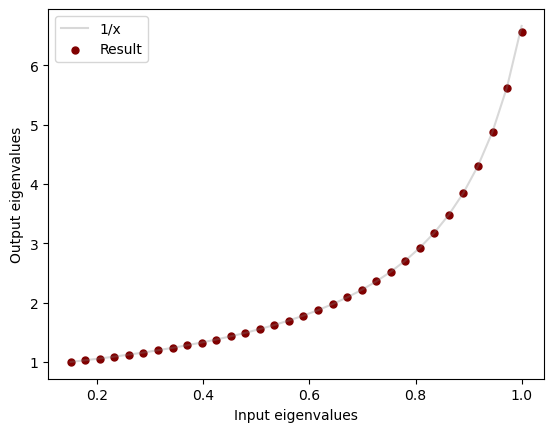

In [28]:
plt.plot(np.real(solver.eigvals)[::-1], 1/np.real(solver.eigvals), '-', alpha=0.3, color='gray', label='1/x')
plt.scatter(np.real(solver.eigvals), np.real(solver.eigvals_out)/solver.scale, color='maroon', s=25, label='Result')
plt.xlabel('Input eigenvalues')
plt.ylabel('Output eigenvalues')
plt.legend()
plt.show()